# **GWU Doctoral Cyber Security Alaytics: Praxis Research**

# **A Holistic Approach to Enable Dynamic Policy Management for Zero Trust Architecure Implementations**

## Jody Spearing

## July 2025

## V3.5

##  **AHC New Connection Classification Overview**

**Section 1:** Create Running Environment
*   Install / Import Libraries
*   Validate Runtime
* Load Data: create dataframe = df_0

**Section 2:** Basic Data Exploration on df_0

**Section 3:** Preprocessing on df_1

**Section 4:** Functions

**Section 5:** Model AHC Clusters

**Section 6:** Calculate Metrics

**Section 7:** Display Visualizations

**Section 8:** Analyze Results

# **Section 1: Install / Import Libraries**

In [ ]:
######################################################################################################################
# Install Necessary Libraries
######################################################################################################################

!apt-get -y install cuda
!pip install pycuda # Moved before cuda-python
!pip install cuda-python
!pip install cudf-cu11
#!pip install --upgrade rmm
#!pip install cupy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cpp-12 cuda-12-9 cuda-cccl-12-9 cuda-command-line-tools-12-9
  cuda-compiler-12-9 cuda-crt-12-9 cuda-cudart-12-9 cuda-cudart-dev-12-9
  cuda-cuobjdump-12-9 cuda-cupti-12-9 cuda-cupti-dev-12-9 cuda-cuxxfilt-12-9
  cuda-demo-suite-12-9 cuda-documentation-12-9 cuda-driver-dev-12-9
  cuda-gdb-12-9 cuda-libraries-12-9 cuda-libraries-dev-12-9 cuda-nsight-12-9
  cuda-nsight-compute-12-9 cuda-nsight-systems-12-9 cuda-nvcc-12-9
  cuda-nvdisasm-12-9 cuda-nvml-dev-12-9 cuda-nvprof-12-9 cuda-nvprune-12-9
  cuda-nvrtc-12-9 cuda-nvrtc-dev-12-9 cuda-nvtx-12-9 cuda-nvvm-12-9
  cuda-nvvp-12-9 cuda-opencl-12-9 cuda-profiler-api-12-9 cuda-runtime-12-9
  cuda-sandbox-dev-12-9 cuda-sanitizer-12-9 cuda-toolkit-12-9
  cuda-toolkit-12-9-config-common cuda-tools-12-9 cuda-visual-tools-12-9
  dctrl-tools default-jre default-jre-headless dkms fakeroot fonts-dejav

In [ ]:
######################################################################################################################
## Import Python libraries
######################################################################################################################

import pandas as pd
import numpy as np
from datetime import datetime
import time
import os
from google.colab import drive
import logging
#import cudf
import cupy as cp
from math import comb
from psutil import virtual_memory
import tensorflow as tf
import torch

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture

from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
import gc

# Preprocessing Libraries
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import LatentDirichletAllocation
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

#Clustering Metrics Libraries
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, normalized_mutual_info_score

# Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# **Section 1: Validate Runtime**

In [ ]:
######################################################################################################################
# check CUDA version
######################################################################################################################
!nvidia-smi

#Use cudf.pandas as a magic
#%load_ext cudf.pandas

Fri May 16 23:06:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   32C    P0             52W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

# **Section 1: Load Data: Original Dataframe = df_0**

In [ ]:
######################################################################################################################
# get / set working directory
# List Contents of working directory
######################################################################################################################

# Check if drive is already mounted before attempting to mount again
# Use force_remount=True to remount if it is already mounted.
import os
if not os.path.exists('/content/gdrive'):

    drive.mount('/content/gdrive', force_remount=True)
else:
    print("Drive is already mounted.")

!ls "/content/gdrive/My Drive/GWU/Praxis"

Mounted at /content/gdrive
data
requirements.txt
results
Spearing_Jody_Praxis_Draft_v04282025v2.docx
Spearing_Jody_Praxis_Draft_v04302025v2.docx
Spearing_Jody_Praxis_Draft_v05072025v2.docx
Spearing_Jody_Praxis_Draft_v05072025v4.docx
Spearing_Jody_Praxis_Draft_v05102025v2.docx
Spearing_Jody_Praxis_Draft_v05112025v2.docx
Spearing_Jody_Praxis_Draft_v05122025v2.docx
Spearing_Jody_Praxis_Draft_v05142025v2.docx
Spearing_Jody_Praxis_Draft_v05152025v2.docx
Spearing_Jody_Praxis_Draft_v05162025v2.docx


In [ ]:
######################################################################################################################
# Load Data file into dataframe 'df_0' denoting original
# Define the path to the Google Drive directory where the dataset is stored
# Define the name of the dataset file
# Combine the path and filename into a full path to the data file
# Optional: Limit the number of rows read for testing large files (commented out)
# nRowsRead random sample used for testing
# Read the CSV file into a pandas DataFrame
# Optionally, you could use nrows=nRowsRead for testing large datasets
# Print the first few rows of the DataFrame to verify that the file was read correctly
# Handle case where the file path is incorrect or file is missing
# Handle case where the CSV file has formatting issues and can't be parsed
# Catch any other unexpected exceptions and print the error message
######################################################################################################################

drive_path = '/content/gdrive/My Drive/GWU/Praxis/data/'
data = 'Dataset-Unicauca-Version2-87Atts 2.csv'

results_path = '/content/gdrive/My Drive/GWU/Praxis/results/'
results_data = 'GMM_Label_Encoder_Results20250506_184706.csv'
data_file = drive_path + data
results_data_file = results_path + results_data
nRowsRead = 1_000_000


try:
  # load full file
  df_0 = pd.read_csv(data_file)
  results_df = pd.read_csv(results_data_file)

  # Load random Sample
  df_sampled = df_0.sample(n=nRowsRead, random_state=42)

  print(df_0.shape)
  print(df_sampled.shape)
  #print(df.head()) # Print the first few rows to verify

  print(results_df.shape)
  print(results_df.head())

except FileNotFoundError:
  print(f"Error: File not found at {data_file}")
except pd.errors.ParserError:
  print(f"Error: Unable to parse the file at {data_file}. Check file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

(3577296, 87)
(1000000, 87)
(1000000, 87)
                                  Flow.ID      Source.IP  Source.Port  \
0   192.168.42.58-10.200.7.6-50606-3128-6     10.200.7.6         3128   
1   192.168.90.50-10.200.7.6-50075-3128-6  192.168.90.50        50075   
2    192.168.60.7-10.200.7.4-51127-3128-6   192.168.60.7        51127   
3   10.200.7.196-68.67.178.196-33221-80-6   10.200.7.196        33221   
4  10.200.7.194-104.91.156.236-49141-80-6   10.200.7.194        49141   

   Destination.IP  Destination.Port  Protocol           Timestamp  \
0   192.168.42.58             50606         6  11/05/201709:27:41   
1      10.200.7.6              3128         6  15/05/201704:41:31   
2      10.200.7.4              3128         6  11/05/201709:58:31   
3   68.67.178.196                80         6  26/04/201711:11:37   
4  104.91.156.236                80         6  27/04/201709:12:00   

   Flow.Duration  Total.Fwd.Packets  Total.Backward.Packets  ...  Active.Std  \
0            123        

In [ ]:
######################################################################################################################
# Write results csv file to drive
######################################################################################################################

def write_labeled_df_tocsv_timestamp(output_file, output_dir, timestamp):

  try:
    print("Writing the file to ..." + output_dir)
    df_0.to_csv(output_path, index=False)
    print(f"Dataset written with shape: {df_0.shape}")

  except FileNotFoundError:
      print(f"Error: File not found at {output_dir}")
      return []
  except pd.errors.ParserError:
      print(f"Error: Unable to parse the file at {output_dir}. Check the file format.")
      return []
  except Exception as e:
      print(f"An unexpected error occurred: {e}")
      return []

In [ ]:
df = df_0.copy()
df.shape

(3577296, 87)

X_binary.shape (6558, 75)
X_train.shape (4590, 75)
X_val.shape (1968, 75)


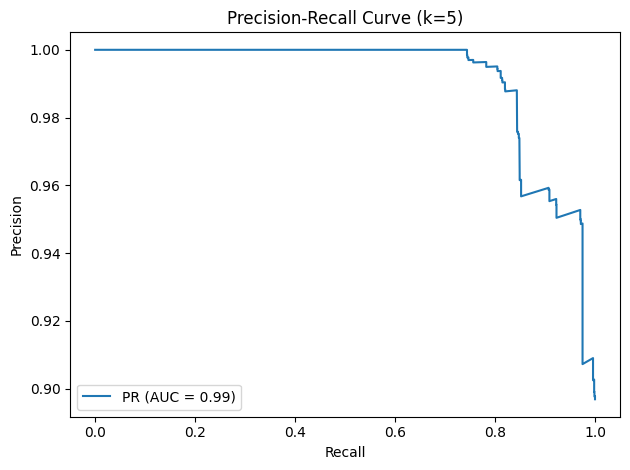

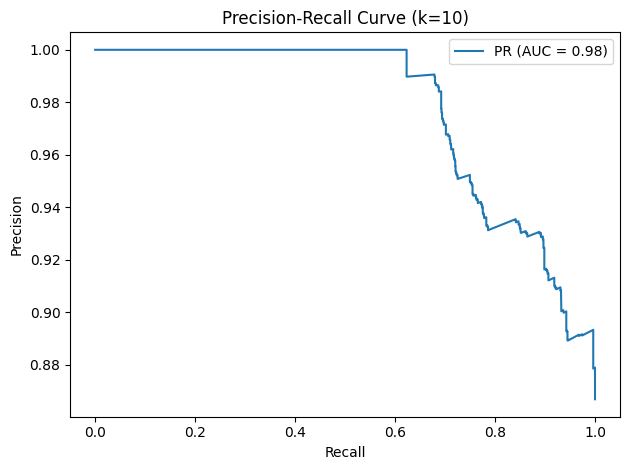

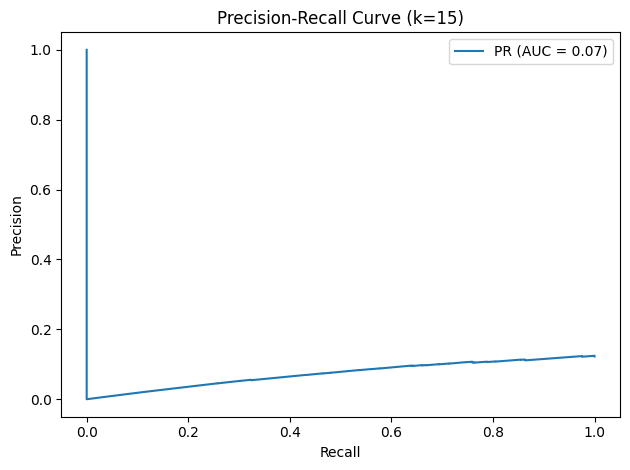

📁 Results saved to 'ahc_evaluation_metrics.csv'
             Timestamp  Clusters       ARI   ROC AUC    PR AUC  Accuracy  \
0  2025-05-16T23:33:12         5  0.769020  0.925313  0.991238  0.995095   
1  2025-05-16T23:33:14        10  0.860141  0.857845  0.976859  0.990590   
2  2025-05-16T23:33:16        15  0.876070  0.169913  0.072966  0.124419   

   Precision    Recall  F1 Score  Top-3 Accuracy       TPR       FPR  \
0   0.995146  0.995095  0.995116        1.000000  0.804533  0.034483   
1   0.990590  0.990590  0.990590        0.990590  0.678781  0.041985   
2   0.148504  0.124419  0.126164        0.350542  1.000000  0.982050   

        TNR       FNR    TP    FP   TN   FN  Avg Entropy  Avg Coherence  
0  0.965517  0.195467  1420     7  196  345     1.549464       0.719889  
1  0.958015  0.321219  1158    11  251  548     2.256557       0.673720  
2  0.017950  0.000000   241  1696   31    0     2.664581       0.748261  


In [ ]:
# Evaluate AHC for multiple cluster sizes with visualizations and extended metrics

# Step 1: Prepare binary matrix from df
general_protocols = ['DNS', 'SSL_NO_CERT', 'TCP', 'UDP', 'ICMP', 'NTP', 'ARP', 'IPV6', 'IGMP']
df_filtered = df[~df['ProtocolName'].isin(general_protocols)]
ip_protocol_matrix = pd.crosstab(df_filtered['Source.IP'], df_filtered['ProtocolName'])
ip_protocol_matrix = ip_protocol_matrix.loc[:, (ip_protocol_matrix != 0).any(axis=0)]
ip_protocol_matrix = ip_protocol_matrix[ip_protocol_matrix.sum(axis=1) > 0]
X_binary = (ip_protocol_matrix > 0).astype(int)

print('X_binary.shape', X_binary.shape)

# Step 2: Train/Validation split
X_train, X_val = train_test_split(X_binary, test_size=0.3, random_state=42)
print('X_train.shape', X_train.shape)
print('X_val.shape', X_val.shape)

# Step 3: Loop over different cluster sizes
results = []
os.makedirs("plots", exist_ok=True)

for k in [5, 10, 15]:
    Z_train = linkage(X_train, method='ward')
    train_labels = fcluster(Z_train, k, criterion='maxclust')
    train_df = pd.DataFrame(X_train)
    train_df['Cluster'] = train_labels
    centroids = train_df.groupby('Cluster').mean()

    Z_val = linkage(X_val, method='ward')
    val_true_labels = fcluster(Z_val, k, criterion='maxclust') - 1

    distances = cdist(X_val, centroids.values, metric='cosine')
    similarities = 1 - distances
    val_pred_labels = similarities.argmax(axis=1)
    val_confidence = similarities.max(axis=1)
    val_correct = (val_pred_labels == val_true_labels).astype(int)

    fpr, tpr, thresholds = roc_curve(val_correct, val_confidence)
    roc_auc = auc(fpr, tpr)
    youden_j = tpr - fpr
    optimal_idx = np.argmax(youden_j)
    optimal_threshold = thresholds[optimal_idx]

    mask = val_confidence >= optimal_threshold
    val_true = val_true_labels[mask]
    val_pred = val_pred_labels[mask]

    precision = precision_score(val_true, val_pred, average='weighted', zero_division=0)
    recall = recall_score(val_true, val_pred, average='weighted', zero_division=0)
    f1 = f1_score(val_true, val_pred, average='weighted', zero_division=0)
    accuracy = accuracy_score(val_true, val_pred)
    ari = adjusted_rand_score(val_true_labels, val_pred_labels)
    d_prec, d_rec, _ = precision_recall_curve(val_correct, val_confidence)
    pr_auc = auc(d_rec, d_prec)
    topk_acc = top_k_accuracy_score(val_true, similarities[mask], k=3, labels=np.arange(similarities.shape[1]))

    bin_cm = confusion_matrix(val_correct, (val_confidence >= optimal_threshold).astype(int))
    fp = bin_cm[0, 1]
    tn = bin_cm[0, 0]
    fn = bin_cm[1, 0]
    tp = bin_cm[1, 1]
    fpr_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr_rate = fn / (fn + tp) if (fn + tp) > 0 else 0
    tpr_rate = tp / (tp + fn) if (tp + fn) > 0 else 0
    tnr_rate = tn / (tn + fp) if (tn + fp) > 0 else 0

    cm = confusion_matrix(val_true, val_pred, labels=np.unique(val_true))

    # Entropy & Coherence (using softmax over similarities)
    prob_dist = softmax(similarities, axis=1)
    row_entropies = scipy_entropy(prob_dist.T)
    avg_entropy = np.mean(row_entropies)

    X_val_df = X_val.copy()
    X_val_df['Cluster'] = val_pred_labels
    coherence_scores = []
    for label in np.unique(val_pred_labels):
        cluster_vectors = X_val_df[X_val_df['Cluster'] == label].drop(columns=['Cluster'])
        if len(cluster_vectors) > 1:
            sim_matrix = cosine_similarity(cluster_vectors)
            upper_triangle = sim_matrix[np.triu_indices_from(sim_matrix, k=1)]
            coherence_scores.append(np.mean(upper_triangle))
        else:
            coherence_scores.append(0)
    avg_coherence = np.mean(coherence_scores)

    # Plot ROC
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label='Optimal Threshold')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f'ROC Curve (k={k})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"plots/ahc_k{k}_roc.png")
    plt.close()

    # Plot PR
    plt.figure()
    plt.plot(d_rec, d_prec, label=f'PR (AUC = {pr_auc:.2f})')
    plt.title(f'Precision-Recall Curve (k={k})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.savefig(f"plots/ahc_k{k}_pr.png")
    plt.close()

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix (k={k})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.savefig(f"plots/ahc_k{k}_confmat.png")
    plt.close()

    results.append({
        'Timestamp': datetime.now().isoformat(timespec='seconds'),
        'Clusters': k,
        'ARI': ari,
        'ROC AUC': roc_auc,
        'PR AUC': pr_auc,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Top-3 Accuracy': topk_acc,
        'TPR': tpr_rate,
        'FPR': fpr_rate,
        'TNR': tnr_rate,
        'FNR': fnr_rate,
        'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn,
        'Avg Entropy': avg_entropy,
        'Avg Coherence': avg_coherence
    })

# Save results
results_df = pd.DataFrame(results)
results_df.to_csv("ahc_evaluation_metrics.csv", index=False)
print("📁 Results saved to 'ahc_evaluation_metrics.csv'")
print(results_df)


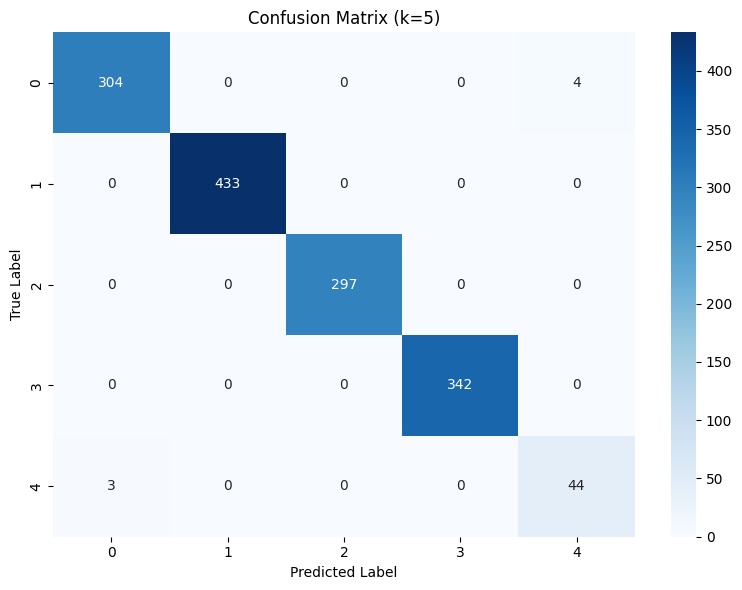

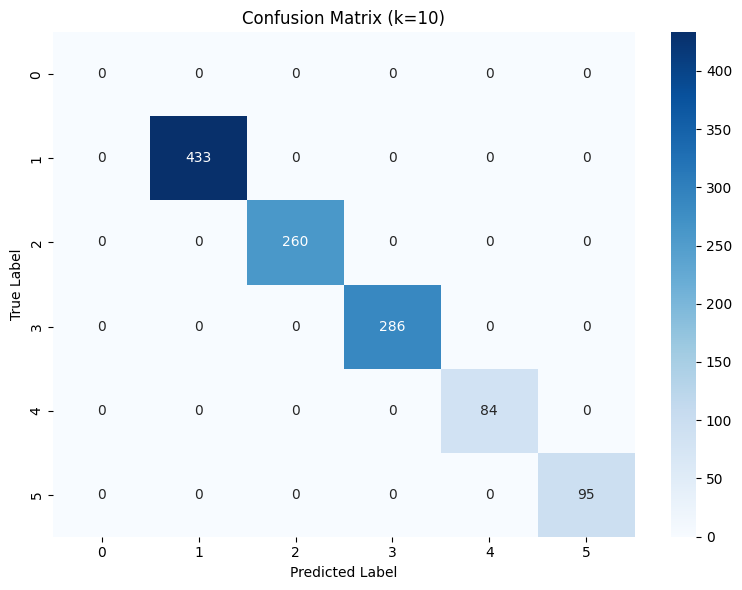

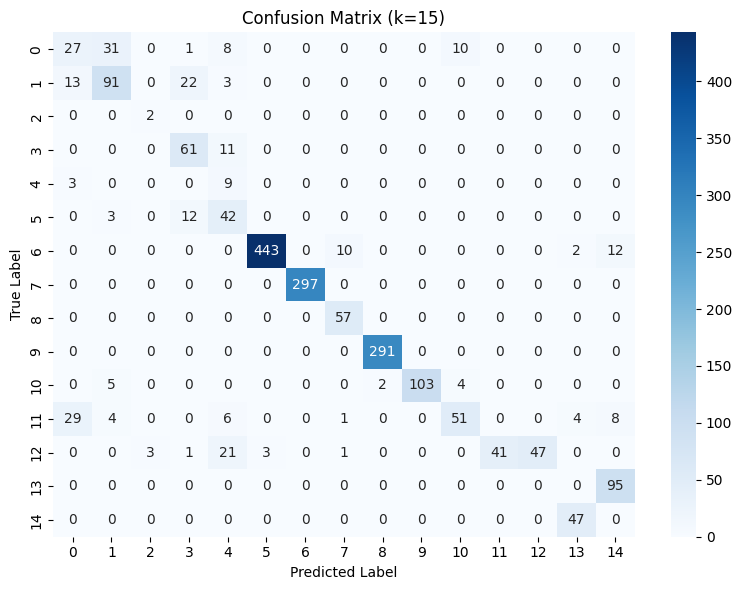

📁 Results saved to 'ahc_evaluation_metrics.csv'
             Timestamp  Clusters       ARI   ROC AUC    PR AUC  Accuracy  \
0  2025-05-14T19:19:48         5  0.769020  0.925313  0.991238  0.995095   
1  2025-05-14T19:19:50        10  0.860141  0.857845  0.976859  0.990590   
2  2025-05-14T19:19:52        15  0.876070  0.169913  0.072966  0.124419   

   Precision    Recall  F1 Score  Top-3 Accuracy       TPR       FPR  \
0   0.995146  0.995095  0.995116        1.000000  0.804533  0.034483   
1   0.990590  0.990590  0.990590        0.990590  0.678781  0.041985   
2   0.148504  0.124419  0.126164        0.350542  1.000000  0.982050   

        TNR       FNR    TP    FP   TN   FN  Avg Entropy  Avg Coherence  
0  0.965517  0.195467  1420     7  196  345          NaN       0.719889  
1  0.958015  0.321219  1158    11  251  548          NaN       0.673720  
2  0.017950  0.000000   241  1696   31    0          NaN       0.748261  


In [ ]:
# Evaluate AHC for multiple cluster sizes with visualizations and extended metrics
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, confusion_matrix,
    precision_recall_curve, top_k_accuracy_score, adjusted_rand_score
)
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
from scipy.stats import entropy as scipy_entropy
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Prepare binary matrix from df
general_protocols = ['DNS', 'SSL_NO_CERT', 'TCP', 'UDP', 'ICMP', 'NTP', 'ARP', 'IPV6', 'IGMP']
df_filtered = df[~df['ProtocolName'].isin(general_protocols)]
ip_protocol_matrix = pd.crosstab(df_filtered['Source.IP'], df_filtered['ProtocolName'])
ip_protocol_matrix = ip_protocol_matrix.loc[:, (ip_protocol_matrix != 0).any(axis=0)]
ip_protocol_matrix = ip_protocol_matrix[ip_protocol_matrix.sum(axis=1) > 0]
X_binary = (ip_protocol_matrix > 0).astype(int)

# Step 2: Train/Validation split
X_train, X_val = train_test_split(X_binary, test_size=0.3, random_state=42)

# Step 3: Loop over different cluster sizes
results = []
os.makedirs("plots", exist_ok=True)

for k in [5, 10, 15]:
    Z_train = linkage(X_train, method='ward')
    train_labels = fcluster(Z_train, k, criterion='maxclust')
    train_df = pd.DataFrame(X_train)
    train_df['Cluster'] = train_labels
    centroids = train_df.groupby('Cluster').mean()

    Z_val = linkage(X_val, method='ward')
    val_true_labels = fcluster(Z_val, k, criterion='maxclust') - 1

    distances = cdist(X_val, centroids.values, metric='cosine')
    similarities = 1 - distances
    val_pred_labels = similarities.argmax(axis=1)
    val_confidence = similarities.max(axis=1)
    val_correct = (val_pred_labels == val_true_labels).astype(int)

    fpr, tpr, thresholds = roc_curve(val_correct, val_confidence)
    roc_auc = auc(fpr, tpr)
    youden_j = tpr - fpr
    optimal_idx = np.argmax(youden_j)
    optimal_threshold = thresholds[optimal_idx]

    mask = val_confidence >= optimal_threshold
    val_true = val_true_labels[mask]
    val_pred = val_pred_labels[mask]

    precision = precision_score(val_true, val_pred, average='weighted', zero_division=0)
    recall = recall_score(val_true, val_pred, average='weighted', zero_division=0)
    f1 = f1_score(val_true, val_pred, average='weighted', zero_division=0)
    accuracy = accuracy_score(val_true, val_pred)
    ari = adjusted_rand_score(val_true_labels, val_pred_labels)
    d_prec, d_rec, _ = precision_recall_curve(val_correct, val_confidence)
    pr_auc = auc(d_rec, d_prec)
    topk_acc = top_k_accuracy_score(val_true, similarities[mask], k=3, labels=np.arange(similarities.shape[1]))

    bin_cm = confusion_matrix(val_correct, (val_confidence >= optimal_threshold).astype(int))
    fp = bin_cm[0, 1]
    tn = bin_cm[0, 0]
    fn = bin_cm[1, 0]
    tp = bin_cm[1, 1]
    fpr_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr_rate = fn / (fn + tp) if (fn + tp) > 0 else 0
    tpr_rate = tp / (tp + fn) if (tp + fn) > 0 else 0
    tnr_rate = tn / (tn + fp) if (tn + fp) > 0 else 0

    cm = confusion_matrix(val_true, val_pred, labels=np.unique(val_true))

    # Entropy & Coherence
    row_entropies = scipy_entropy(similarities.T)
    avg_entropy = np.mean(row_entropies)

    X_val_df = X_val.copy()
    X_val_df['Cluster'] = val_pred_labels
    coherence_scores = []
    for label in np.unique(val_pred_labels):
        cluster_vectors = X_val_df[X_val_df['Cluster'] == label].drop(columns=['Cluster'])
        if len(cluster_vectors) > 1:
            sim_matrix = cosine_similarity(cluster_vectors)
            upper_triangle = sim_matrix[np.triu_indices_from(sim_matrix, k=1)]
            coherence_scores.append(np.mean(upper_triangle))
        else:
            coherence_scores.append(0)
    avg_coherence = np.mean(coherence_scores)

    # Plot ROC
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label='Optimal Threshold')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f'ROC Curve (k={k})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"plots/ahc_k{k}_roc.png")
    plt.close()

    # Plot PR
    plt.figure()
    plt.plot(d_rec, d_prec, label=f'PR (AUC = {pr_auc:.2f})')
    plt.title(f'Precision-Recall Curve (k={k})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"plots/ahc_k{k}_pr.png")
    plt.close()

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix (k={k})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()
    plt.savefig(f"plots/ahc_k{k}_confmat.png")
    plt.close()

    results.append({
        'Timestamp': datetime.now().isoformat(timespec='seconds'),
        'Clusters': k,
        'ARI': ari,
        'ROC AUC': roc_auc,
        'PR AUC': pr_auc,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Top-3 Accuracy': topk_acc,
        'TPR': tpr_rate,
        'FPR': fpr_rate,
        'TNR': tnr_rate,
        'FNR': fnr_rate,
        'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn,
        'Avg Entropy': avg_entropy,
        'Avg Coherence': avg_coherence
    })

# Save results
results_df = pd.DataFrame(results)
results_df.to_csv("ahc_evaluation_metrics.csv", index=False)
print("📁 Results saved to 'ahc_evaluation_metrics.csv'")
print(results_df)


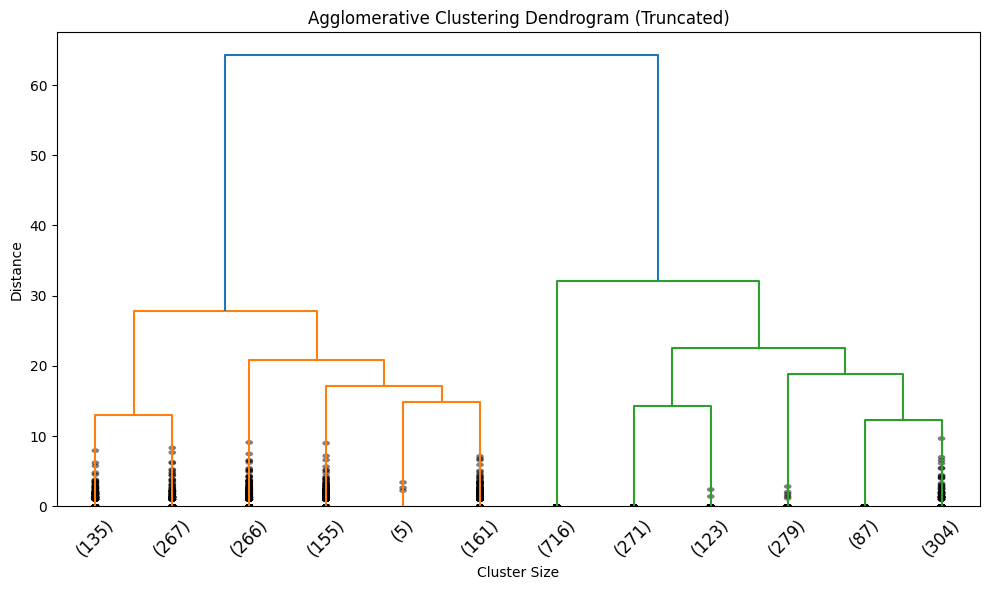

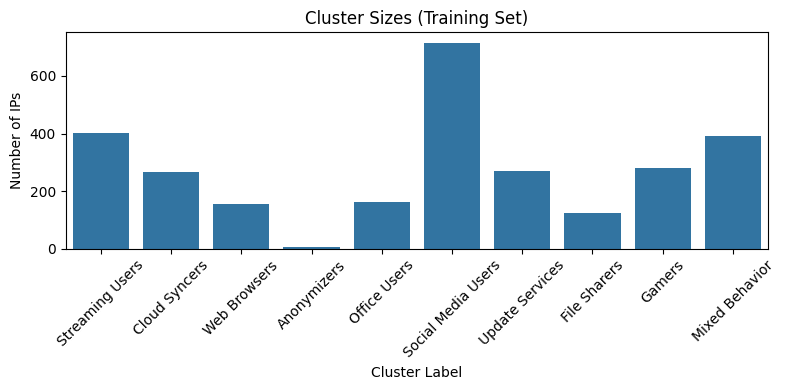

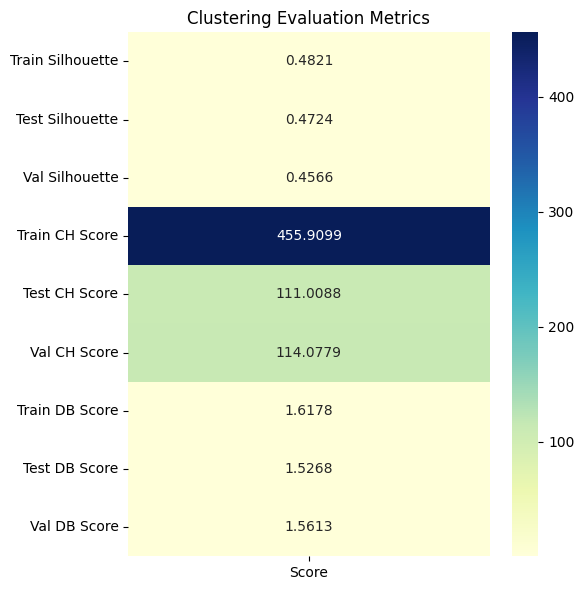

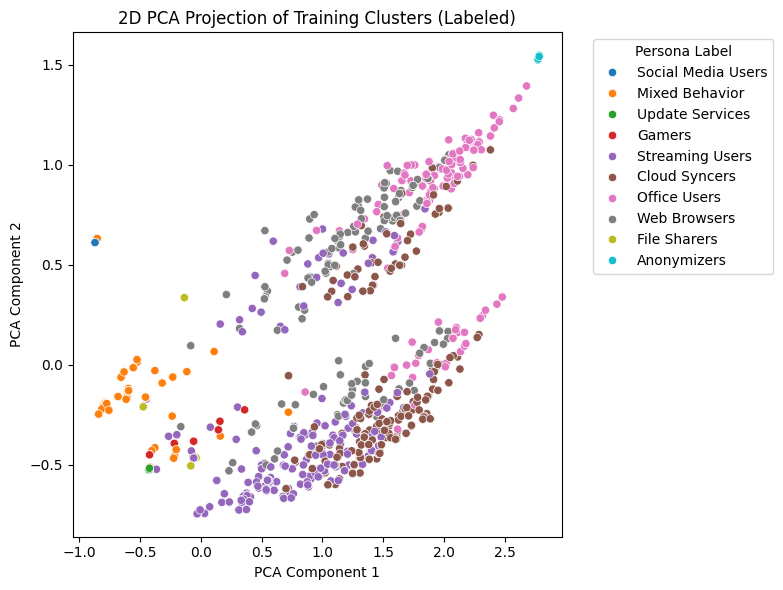

Train Silhouette: 0.4821
Test Silhouette: 0.4724
Val Silhouette: 0.4566
Train CH Score: 455.9099
Test CH Score: 111.0088
Val CH Score: 114.0779
Train DB Score: 1.6178
Test DB Score: 1.5268
Val DB Score: 1.5613


In [ ]:
# --- STEP 0: Setup ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 1: Preprocessing ---
general_protocols = [
    'DNS', 'SSL', 'SSL_NO_CERT', 'HTTP', 'TCP', 'UDP', 'ICMP', 'NTP',
    'ARP', 'IPV6', 'IGMP', 'HTTP_CONNECT', 'HTTP_DOWNLOAD'
]

# Filter general protocols
df_filtered = df[~df['ProtocolName'].isin(general_protocols)]

# Create binary Source.IP x ProtocolName matrix
ip_protocol_matrix = pd.crosstab(df_filtered['Source.IP'], df_filtered['ProtocolName'])
ip_protocol_matrix = ip_protocol_matrix.loc[:, (ip_protocol_matrix != 0).any(axis=0)]
ip_protocol_matrix = ip_protocol_matrix[ip_protocol_matrix.sum(axis=1) > 0]
X_binary = (ip_protocol_matrix > 0).astype(int)

# --- STEP 2: Split Data ---
X_train, X_temp = train_test_split(X_binary, test_size=0.3, random_state=42)
X_test, X_val = train_test_split(X_temp, test_size=0.5, random_state=42)

# --- STEP 3: Agglomerative Clustering ---
Z = linkage(X_train, method='ward')
k = 10
train_labels = fcluster(Z, k, criterion='maxclust')

# --- STEP 4: Assign Test/Val to Nearest Cluster ---
train_centroids = pd.DataFrame(X_train).copy()
train_centroids['Cluster'] = train_labels
centroids = train_centroids.groupby('Cluster').mean()

def assign_to_nearest_centroid(X_new, centroids, metric='euclidean'):
    distances = cdist(X_new, centroids, metric=metric)
    return np.argmin(distances, axis=1) + 1

test_labels = assign_to_nearest_centroid(X_test, centroids)
val_labels = assign_to_nearest_centroid(X_val, centroids)

# --- STEP 5: Clustering Metrics ---
metrics = {
    'Train Silhouette': silhouette_score(X_train, train_labels),
    'Test Silhouette': silhouette_score(X_test, test_labels),
    'Val Silhouette': silhouette_score(X_val, val_labels),
    'Train CH Score': calinski_harabasz_score(X_train, train_labels),
    'Test CH Score': calinski_harabasz_score(X_test, test_labels),
    'Val CH Score': calinski_harabasz_score(X_val, val_labels),
    'Train DB Score': davies_bouldin_score(X_train, train_labels),
    'Test DB Score': davies_bouldin_score(X_test, test_labels),
    'Val DB Score': davies_bouldin_score(X_val, val_labels),
}

# --- STEP 6: Generate Human-Readable Cluster Labels ---
cluster_label_map = {
    1: 'Streaming Users',
    2: 'Cloud Syncers',
    3: 'Web Browsers',
    4: 'Anonymizers',
    5: 'Office Users',
    6: 'Social Media Users',
    7: 'Update Services',
    8: 'File Sharers',
    9: 'Gamers',
    10: 'Mixed Behavior'
}
readable_labels = pd.Series(train_labels).map(cluster_label_map)

# --- STEP 7: Dendrogram ---
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title('Agglomerative Clustering Dendrogram (Truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# --- STEP 8: Cluster Size Plot ---
cluster_sizes = pd.Series(train_labels).value_counts().sort_index()
plt.figure(figsize=(8, 4))
sns.barplot(x=cluster_sizes.index.map(cluster_label_map), y=cluster_sizes.values)
plt.title('Cluster Sizes (Training Set)')
plt.xlabel('Cluster Label')
plt.ylabel('Number of IPs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- STEP 9: Metrics Heatmap ---
metrics_df = pd.DataFrame(metrics, index=[0]).T
metrics_df.columns = ['Score']
plt.figure(figsize=(6, 6))
sns.heatmap(metrics_df, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Clustering Evaluation Metrics")
plt.tight_layout()
plt.show()

# --- STEP 10: 2D Cluster Visualization (PCA) ---
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=readable_labels, palette='tab10', legend='full')
plt.title('2D PCA Projection of Training Clusters (Labeled)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Persona Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- STEP 11: Show Metrics ---
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")


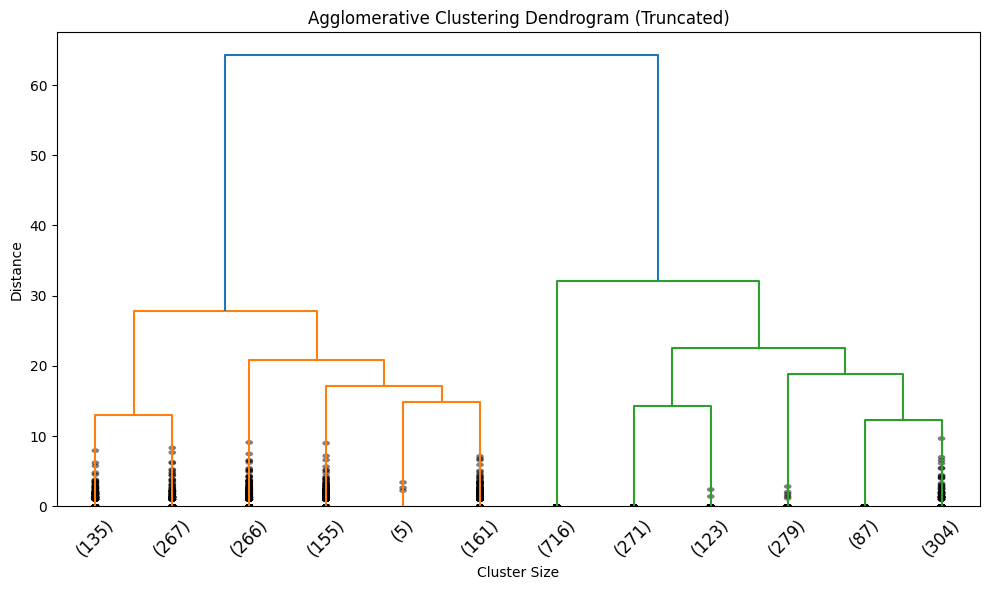

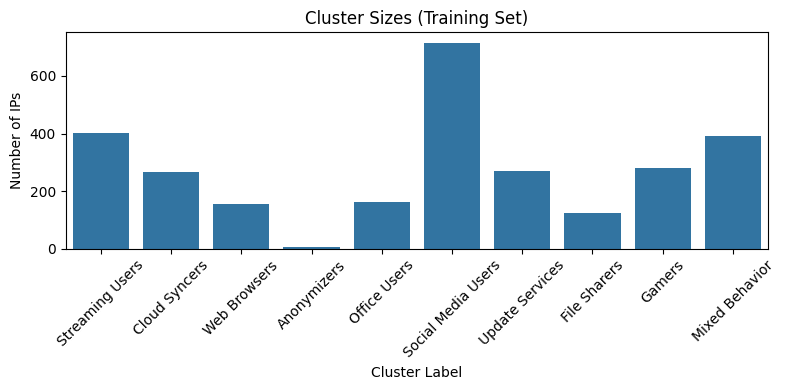

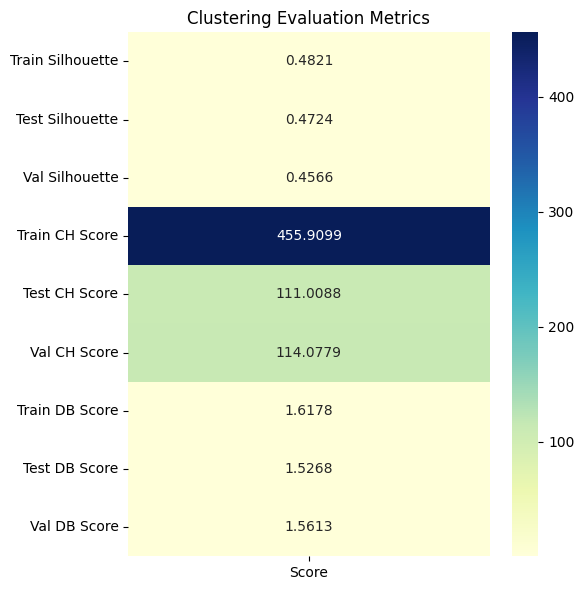

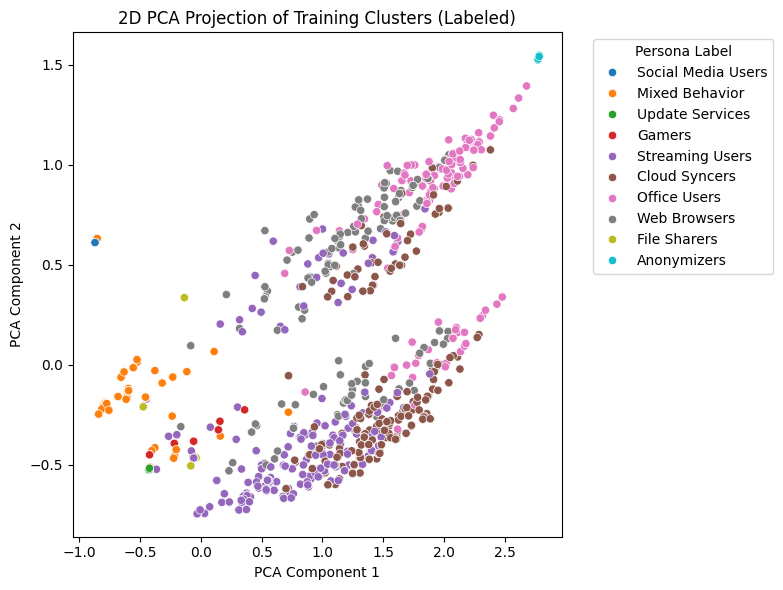

Train Silhouette: 0.4821
Test Silhouette: 0.4724
Val Silhouette: 0.4566
Train CH Score: 455.9099
Test CH Score: 111.0088
Val CH Score: 114.0779
Train DB Score: 1.6178
Test DB Score: 1.5268
Val DB Score: 1.5613


In [ ]:
# --- STEP 0: Setup ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 1: Preprocessing ---
general_protocols = [
    'DNS', 'SSL', 'SSL_NO_CERT', 'HTTP', 'TCP', 'UDP', 'ICMP', 'NTP',
    'ARP', 'IPV6', 'IGMP', 'HTTP_CONNECT', 'HTTP_DOWNLOAD'
]

# Filter general protocols
df_filtered = df[~df['ProtocolName'].isin(general_protocols)]

# Create binary Source.IP x ProtocolName matrix
ip_protocol_matrix = pd.crosstab(df_filtered['Source.IP'], df_filtered['ProtocolName'])
ip_protocol_matrix = ip_protocol_matrix.loc[:, (ip_protocol_matrix != 0).any(axis=0)]
ip_protocol_matrix = ip_protocol_matrix[ip_protocol_matrix.sum(axis=1) > 0]
X_binary = (ip_protocol_matrix > 0).astype(int)

# --- STEP 2: Split Data ---
X_train, X_temp = train_test_split(X_binary, test_size=0.3, random_state=42)
X_test, X_val = train_test_split(X_temp, test_size=0.5, random_state=42)

# --- STEP 3: Agglomerative Clustering ---
Z = linkage(X_train, method='ward')
k = 10
train_labels = fcluster(Z, k, criterion='maxclust')

# --- STEP 4: Assign Test/Val to Nearest Cluster ---
train_centroids = pd.DataFrame(X_train).copy()
train_centroids['Cluster'] = train_labels
centroids = train_centroids.groupby('Cluster').mean()

def assign_to_nearest_centroid(X_new, centroids, metric='euclidean'):
    distances = cdist(X_new, centroids, metric=metric)
    return np.argmin(distances, axis=1) + 1

test_labels = assign_to_nearest_centroid(X_test, centroids)
val_labels = assign_to_nearest_centroid(X_val, centroids)

# --- STEP 5: Clustering Metrics ---
metrics = {
    'Train Silhouette': silhouette_score(X_train, train_labels),
    'Test Silhouette': silhouette_score(X_test, test_labels),
    'Val Silhouette': silhouette_score(X_val, val_labels),
    'Train CH Score': calinski_harabasz_score(X_train, train_labels),
    'Test CH Score': calinski_harabasz_score(X_test, test_labels),
    'Val CH Score': calinski_harabasz_score(X_val, val_labels),
    'Train DB Score': davies_bouldin_score(X_train, train_labels),
    'Test DB Score': davies_bouldin_score(X_test, test_labels),
    'Val DB Score': davies_bouldin_score(X_val, val_labels),
}

# --- STEP 6: Generate Human-Readable Cluster Labels ---
cluster_label_map = {
    1: 'Streaming Users',
    2: 'Cloud Syncers',
    3: 'Web Browsers',
    4: 'Anonymizers',
    5: 'Office Users',
    6: 'Social Media Users',
    7: 'Update Services',
    8: 'File Sharers',
    9: 'Gamers',
    10: 'Mixed Behavior'
}
readable_labels = pd.Series(train_labels).map(cluster_label_map)

# --- STEP 7: Dendrogram ---
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title('Agglomerative Clustering Dendrogram (Truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# --- STEP 8: Cluster Size Plot ---
cluster_sizes = pd.Series(train_labels).value_counts().sort_index()
plt.figure(figsize=(8, 4))
sns.barplot(x=cluster_sizes.index.map(cluster_label_map), y=cluster_sizes.values)
plt.title('Cluster Sizes (Training Set)')
plt.xlabel('Cluster Label')
plt.ylabel('Number of IPs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- STEP 9: Metrics Heatmap ---
metrics_df = pd.DataFrame(metrics, index=[0]).T
metrics_df.columns = ['Score']
plt.figure(figsize=(6, 6))
sns.heatmap(metrics_df, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Clustering Evaluation Metrics")
plt.tight_layout()
plt.show()

# --- STEP 10: 2D Cluster Visualization (PCA) ---
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=readable_labels, palette='tab10', legend='full')
plt.title('2D PCA Projection of Training Clusters (Labeled)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Persona Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- STEP 11: Show Metrics ---
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")


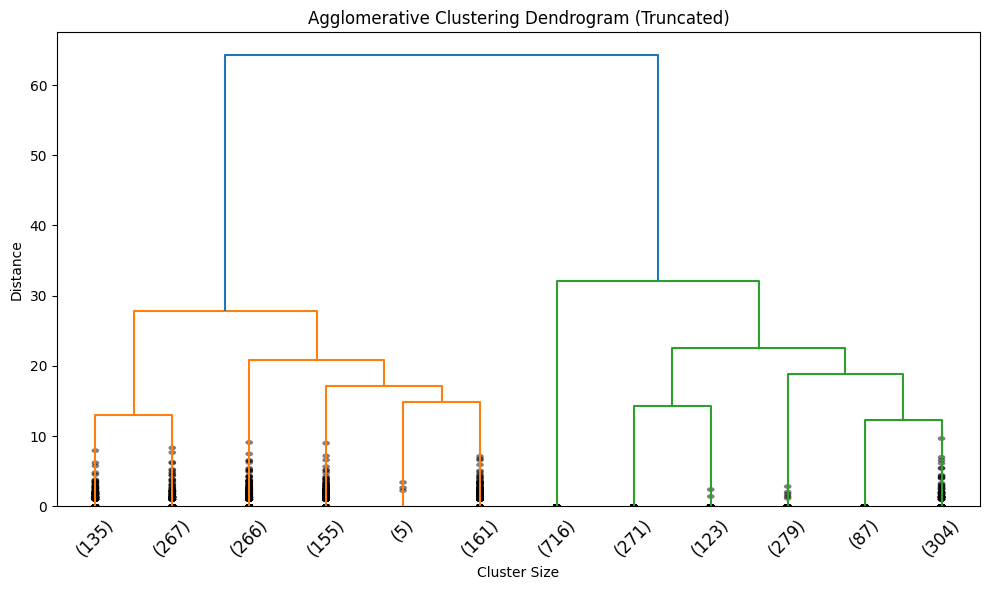

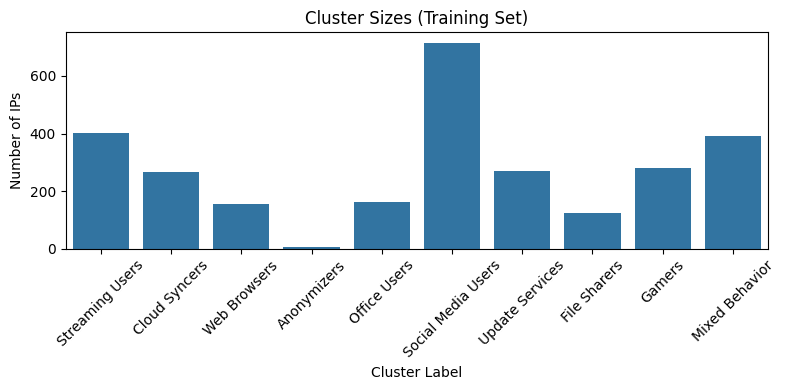

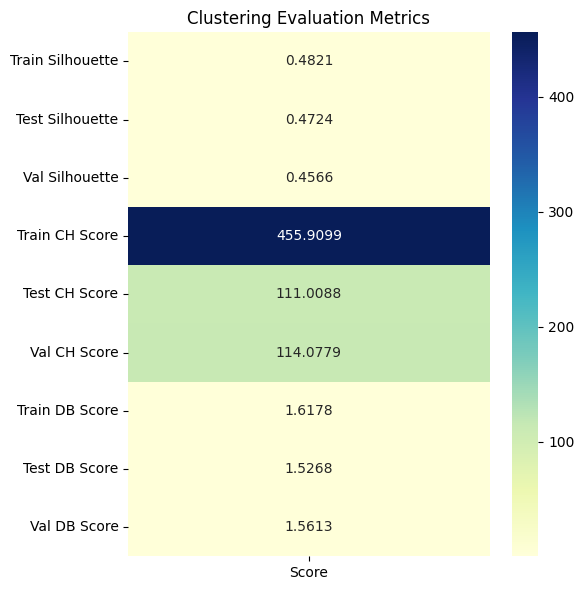

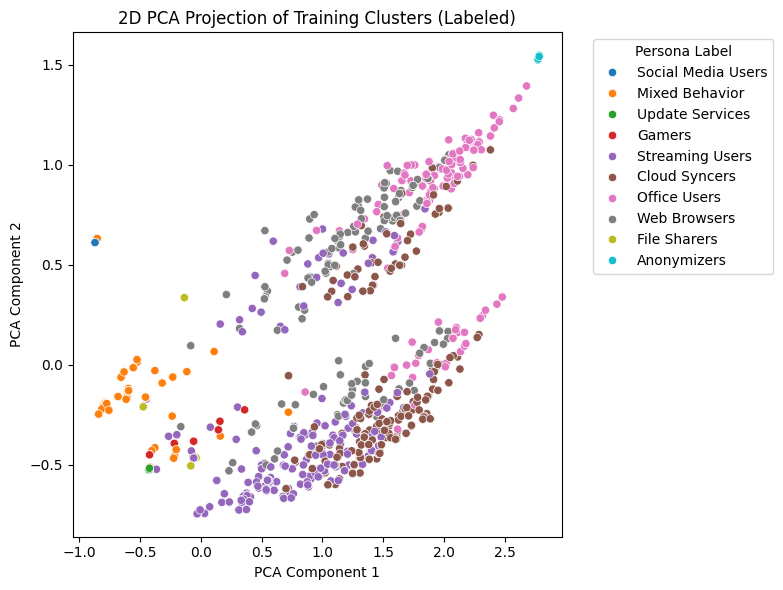

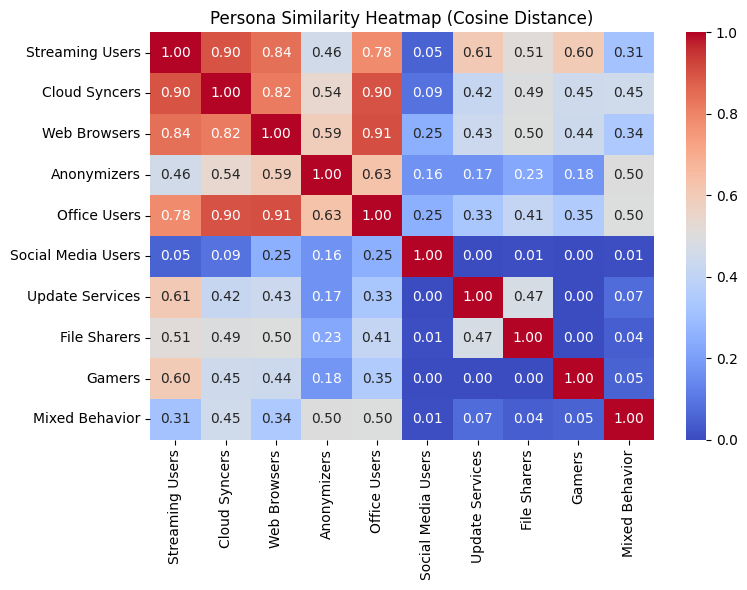

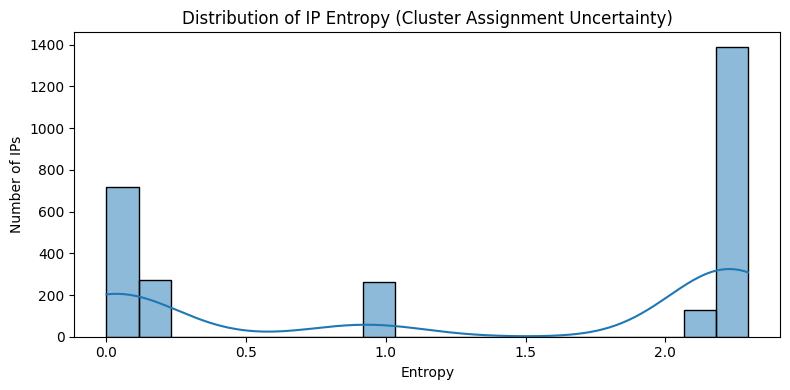


📈 Average Entropy: 1.3241
Persona 1 (Streaming Users): Coherence Score = 430.91
Persona 2 (Cloud Syncers): Coherence Score = 611.89
Persona 3 (Web Browsers): Coherence Score = 695.19
Persona 4 (Anonymizers): Coherence Score = 1690.66
Persona 5 (Office Users): Coherence Score = 1049.66
Persona 6 (Social Media Users): Coherence Score = 0.00
Persona 7 (Update Services): Coherence Score = 0.69
Persona 8 (File Sharers): Coherence Score = 8.36
Persona 9 (Gamers): Coherence Score = 10.33
Persona 10 (Mixed Behavior): Coherence Score = 26.34
Train Silhouette: 0.4821
Test Silhouette: 0.4724
Val Silhouette: 0.4566
Train CH Score: 455.9099
Test CH Score: 111.0088
Val CH Score: 114.0779
Train DB Score: 1.6178
Test DB Score: 1.5268
Val DB Score: 1.5613


In [ ]:
# --- STEP 0: Setup ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import cdist, pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import entropy

# --- STEP 1: Preprocessing ---
general_protocols = [
    'DNS', 'SSL', 'SSL_NO_CERT', 'HTTP', 'TCP', 'UDP', 'ICMP', 'NTP',
    'ARP', 'IPV6', 'IGMP', 'HTTP_CONNECT', 'HTTP_DOWNLOAD'
]

# Filter general protocols
df_filtered = df[~df['ProtocolName'].isin(general_protocols)]

# Create binary Source.IP x ProtocolName matrix
ip_protocol_matrix = pd.crosstab(df_filtered['Source.IP'], df_filtered['ProtocolName'])
ip_protocol_matrix = ip_protocol_matrix.loc[:, (ip_protocol_matrix != 0).any(axis=0)]
ip_protocol_matrix = ip_protocol_matrix[ip_protocol_matrix.sum(axis=1) > 0]
X_binary = (ip_protocol_matrix > 0).astype(int)

# --- STEP 2: Split Data ---
X_train, X_temp = train_test_split(X_binary, test_size=0.3, random_state=42)
X_test, X_val = train_test_split(X_temp, test_size=0.5, random_state=42)

# --- STEP 3: Agglomerative Clustering ---
Z = linkage(X_train, method='ward')
k = 10
train_labels = fcluster(Z, k, criterion='maxclust')

# --- STEP 4: Assign Test/Val to Nearest Cluster ---
train_centroids = pd.DataFrame(X_train).copy()
train_centroids['Cluster'] = train_labels
centroids = train_centroids.groupby('Cluster').mean()

def assign_to_nearest_centroid(X_new, centroids, metric='euclidean'):
    distances = cdist(X_new, centroids, metric=metric)
    return np.argmin(distances, axis=1) + 1

test_labels = assign_to_nearest_centroid(X_test, centroids)
val_labels = assign_to_nearest_centroid(X_val, centroids)

# --- STEP 5: Clustering Metrics ---
metrics = {
    'Train Silhouette': silhouette_score(X_train, train_labels),
    'Test Silhouette': silhouette_score(X_test, test_labels),
    'Val Silhouette': silhouette_score(X_val, val_labels),
    'Train CH Score': calinski_harabasz_score(X_train, train_labels),
    'Test CH Score': calinski_harabasz_score(X_test, test_labels),
    'Val CH Score': calinski_harabasz_score(X_val, val_labels),
    'Train DB Score': davies_bouldin_score(X_train, train_labels),
    'Test DB Score': davies_bouldin_score(X_test, test_labels),
    'Val DB Score': davies_bouldin_score(X_val, val_labels),
}

# --- STEP 6: Generate Human-Readable Cluster Labels ---
cluster_label_map = {
    1: 'Streaming Users',
    2: 'Cloud Syncers',
    3: 'Web Browsers',
    4: 'Anonymizers',
    5: 'Office Users',
    6: 'Social Media Users',
    7: 'Update Services',
    8: 'File Sharers',
    9: 'Gamers',
    10: 'Mixed Behavior'
}
readable_labels = pd.Series(train_labels).map(cluster_label_map)

# --- STEP 7: Dendrogram ---
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title('Agglomerative Clustering Dendrogram (Truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# --- STEP 8: Cluster Size Plot ---
cluster_sizes = pd.Series(train_labels).value_counts().sort_index()
plt.figure(figsize=(8, 4))
sns.barplot(x=cluster_sizes.index.map(cluster_label_map), y=cluster_sizes.values)
plt.title('Cluster Sizes (Training Set)')
plt.xlabel('Cluster Label')
plt.ylabel('Number of IPs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- STEP 9: Metrics Heatmap ---
metrics_df = pd.DataFrame(metrics, index=[0]).T
metrics_df.columns = ['Score']
plt.figure(figsize=(6, 6))
sns.heatmap(metrics_df, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Clustering Evaluation Metrics")
plt.tight_layout()
plt.show()

# --- STEP 10: 2D Cluster Visualization (PCA) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=readable_labels, palette='tab10', legend='full')
plt.title('2D PCA Projection of Training Clusters (Labeled)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Persona Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- STEP 11: Persona Similarity Heatmap (Cosine) ---
persona_centroids = centroids.values
similarity_matrix = 1 - squareform(pdist(persona_centroids, metric='cosine'))

plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=[cluster_label_map[i] for i in range(1, k+1)],
            yticklabels=[cluster_label_map[i] for i in range(1, k+1)])
plt.title("Persona Similarity Heatmap (Cosine Distance)")
plt.tight_layout()
plt.show()

# --- STEP 12: Entropy per IP ---
cluster_prob_matrix = pd.DataFrame(cdist(X_train, centroids, metric='euclidean'))
cluster_prob_matrix = 1 / (cluster_prob_matrix + 1e-9)  # Convert distance to inverse-probability
cluster_prob_matrix = cluster_prob_matrix.div(cluster_prob_matrix.sum(axis=1), axis=0)
entropy_scores = cluster_prob_matrix.apply(entropy, axis=1)

plt.figure(figsize=(8, 4))
sns.histplot(entropy_scores, bins=20, kde=True)
plt.title("Distribution of IP Entropy (Cluster Assignment Uncertainty)")
plt.xlabel("Entropy")
plt.ylabel("Number of IPs")
plt.tight_layout()
plt.show()

print(f"\n📈 Average Entropy: {np.mean(entropy_scores):.4f}")

# --- STEP 13: Coherence Approximation (Protocol Co-Usage) ---
def compute_cluster_coherence(X_bin, labels):
    cluster_scores = []
    for c in np.unique(labels):
        subset = X_bin[labels == c]
        protocols = subset.columns
        score = 0
        for i, p1 in enumerate(protocols):
            for j, p2 in enumerate(protocols):
                if i < j:
                    co_use = (subset[p1] & subset[p2]).sum()
                    score += np.log(1 + co_use)
        cluster_scores.append(score)
    return cluster_scores

coherence_scores = compute_cluster_coherence(pd.DataFrame(X_train, columns=X_binary.columns), train_labels)
for i, score in enumerate(coherence_scores, 1):
    print(f"Persona {i} ({cluster_label_map[i]}): Coherence Score = {score:.2f}")

# --- STEP 14: Show Metrics ---
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")


In [ ]:
df = df_0.copy()
df.shape

NameError: name 'df_0' is not defined

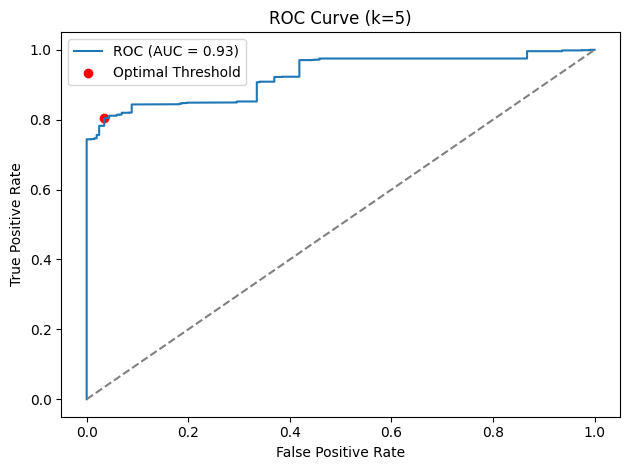

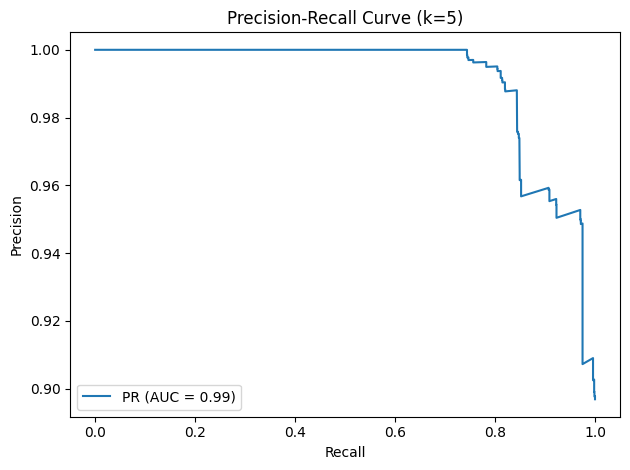

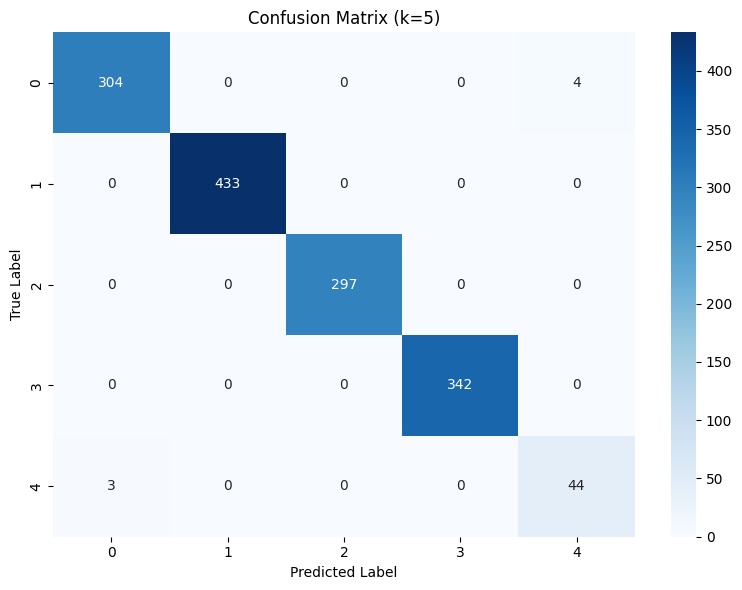

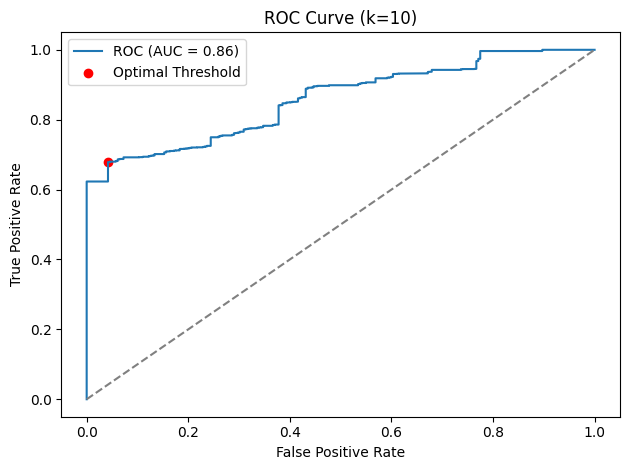

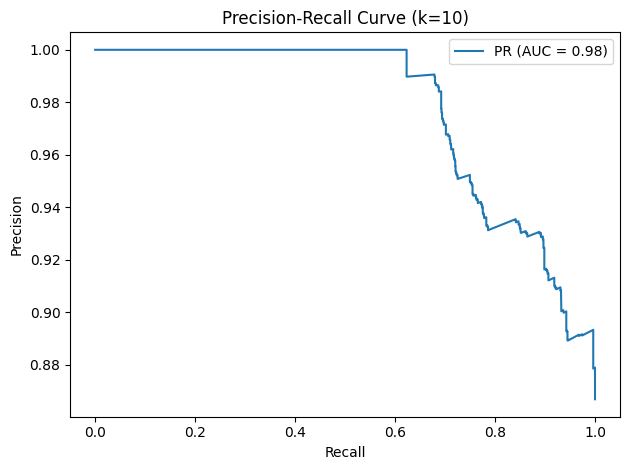

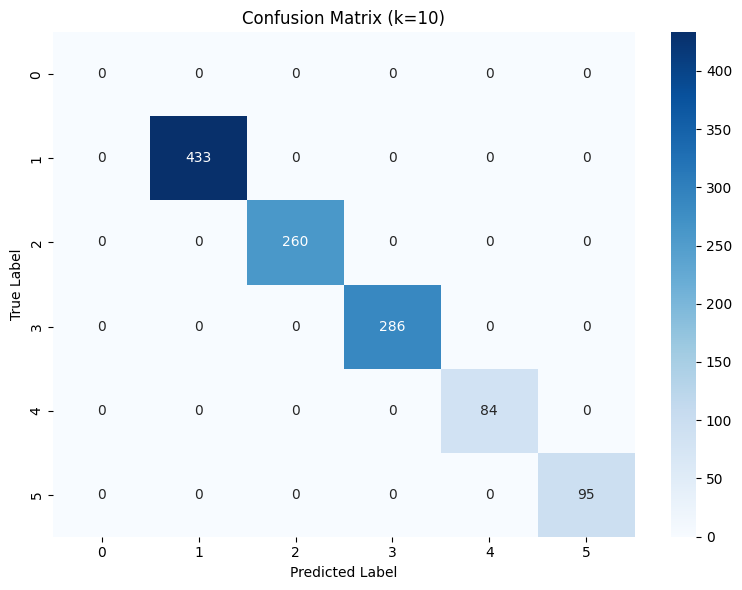

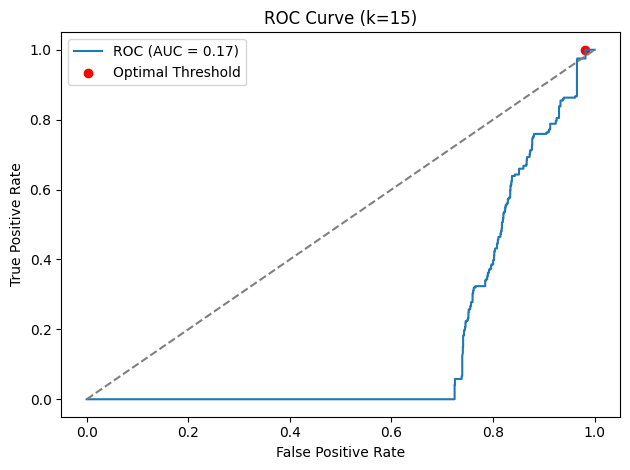

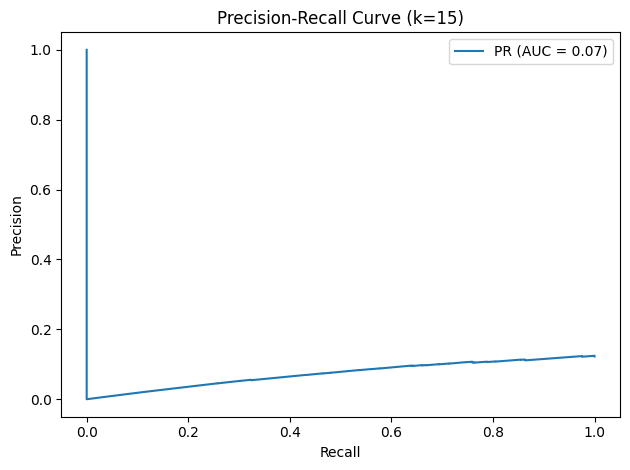

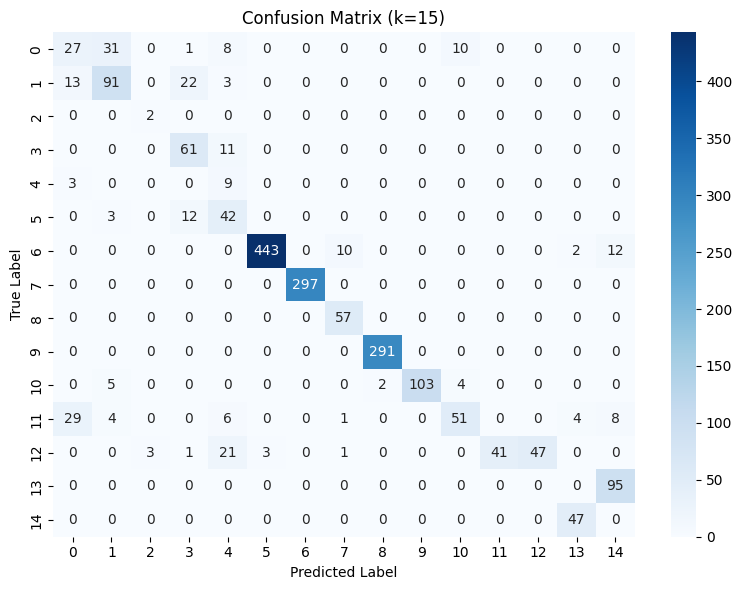

📁 Results saved to 'ahc_evaluation_metrics.csv'
             Timestamp  Clusters       ARI   ROC AUC    PR AUC  Accuracy  \
0  2025-05-14T01:02:26         5  0.769020  0.925313  0.991238  0.995095   
1  2025-05-14T01:02:28        10  0.860141  0.857845  0.976859  0.990590   
2  2025-05-14T01:02:30        15  0.876070  0.169913  0.072966  0.124419   

   Precision    Recall  F1 Score  Top-3 Accuracy       TPR       FPR  \
0   0.995146  0.995095  0.995116        1.000000  0.804533  0.034483   
1   0.990590  0.990590  0.990590        0.990590  0.678781  0.041985   
2   0.148504  0.124419  0.126164        0.350542  1.000000  0.982050   

        TNR       FNR    TP    FP   TN   FN  
0  0.965517  0.195467  1420     7  196  345  
1  0.958015  0.321219  1158    11  251  548  
2  0.017950  0.000000   241  1696   31    0  


In [ ]:
# Evaluate AHC for multiple cluster sizes with visualizations and extended metrics
# final code for predictive model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    adjusted_rand_score, roc_curve, auc, confusion_matrix,
    precision_score, recall_score, f1_score, accuracy_score,
    precision_recall_curve, top_k_accuracy_score
)
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Step 1: Prepare binary matrix from df
general_protocols = ['DNS', 'SSL_NO_CERT', 'TCP', 'UDP', 'ICMP', 'NTP', 'ARP', 'IPV6', 'IGMP']
df_filtered = df[~df['ProtocolName'].isin(general_protocols)]
ip_protocol_matrix = pd.crosstab(df_filtered['Source.IP'], df_filtered['ProtocolName'])
ip_protocol_matrix = ip_protocol_matrix.loc[:, (ip_protocol_matrix != 0).any(axis=0)]
ip_protocol_matrix = ip_protocol_matrix[ip_protocol_matrix.sum(axis=1) > 0]
X_binary = (ip_protocol_matrix > 0).astype(int)

# Step 2: Train/Validation split
X_train, X_val = train_test_split(X_binary, test_size=0.3, random_state=42)

# Step 3: Loop over different cluster sizes
results = []
os.makedirs("plots", exist_ok=True)

for k in [5, 10, 15]:
    Z_train = linkage(X_train, method='ward')
    train_labels = fcluster(Z_train, k, criterion='maxclust')
    train_df = pd.DataFrame(X_train)
    train_df['Cluster'] = train_labels
    centroids = train_df.groupby('Cluster').mean()

    Z_val = linkage(X_val, method='ward')
    val_true_labels = fcluster(Z_val, k, criterion='maxclust') - 1

    distances = cdist(X_val, centroids.values, metric='cosine')
    similarities = 1 - distances
    val_pred_labels = similarities.argmax(axis=1)
    val_confidence = similarities.max(axis=1)
    val_correct = (val_pred_labels == val_true_labels).astype(int)

    fpr, tpr, thresholds = roc_curve(val_correct, val_confidence)
    roc_auc = auc(fpr, tpr)
    youden_j = tpr - fpr
    optimal_idx = np.argmax(youden_j)
    optimal_threshold = thresholds[optimal_idx]

    mask = val_confidence >= optimal_threshold
    val_true = val_true_labels[mask]
    val_pred = val_pred_labels[mask]

    precision = precision_score(val_true, val_pred, average='weighted', zero_division=0)
    recall = recall_score(val_true, val_pred, average='weighted', zero_division=0)
    f1 = f1_score(val_true, val_pred, average='weighted', zero_division=0)
    accuracy = accuracy_score(val_true, val_pred)
    ari = adjusted_rand_score(val_true_labels, val_pred_labels)
    d_prec, d_rec, _ = precision_recall_curve(val_correct, val_confidence)
    pr_auc = auc(d_rec, d_prec)
    topk_acc = top_k_accuracy_score(val_true, similarities[mask], k=3, labels=np.arange(similarities.shape[1]))

    bin_cm = confusion_matrix(val_correct, (val_confidence >= optimal_threshold).astype(int))
    fp = bin_cm[0, 1]
    tn = bin_cm[0, 0]
    fn = bin_cm[1, 0]
    tp = bin_cm[1, 1]
    fpr_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr_rate = fn / (fn + tp) if (fn + tp) > 0 else 0
    tpr_rate = tp / (tp + fn) if (tp + fn) > 0 else 0
    tnr_rate = tn / (tn + fp) if (tn + fp) > 0 else 0

    cm = confusion_matrix(val_true, val_pred, labels=np.unique(val_true))

    # Plot ROC
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label='Optimal Threshold')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f'ROC Curve (k={k})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.savefig(f"plots/ahc_k{k}_roc.png")
    plt.close()

    # Plot PR
    plt.figure()
    plt.plot(d_rec, d_prec, label=f'PR (AUC = {pr_auc:.2f})')
    plt.title(f'Precision-Recall Curve (k={k})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.savefig(f"plots/ahc_k{k}_pr.png")
    plt.close()

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix (k={k})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()
    plt.savefig(f"plots/ahc_k{k}_confmat.png")
    plt.close()

    results.append({
        'Timestamp': datetime.now().isoformat(timespec='seconds'),
        'Clusters': k,
        'ARI': ari,
        'ROC AUC': roc_auc,
        'PR AUC': pr_auc,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Top-3 Accuracy': topk_acc,
        'TPR': tpr_rate,
        'FPR': fpr_rate,
        'TNR': tnr_rate,
        'FNR': fnr_rate,
        'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn
    })

# Save results
results_df = pd.DataFrame(results)
results_df.to_csv("ahc_evaluation_metrics.csv", index=False)
print("📁 Results saved to 'ahc_evaluation_metrics.csv'")
print(results_df)


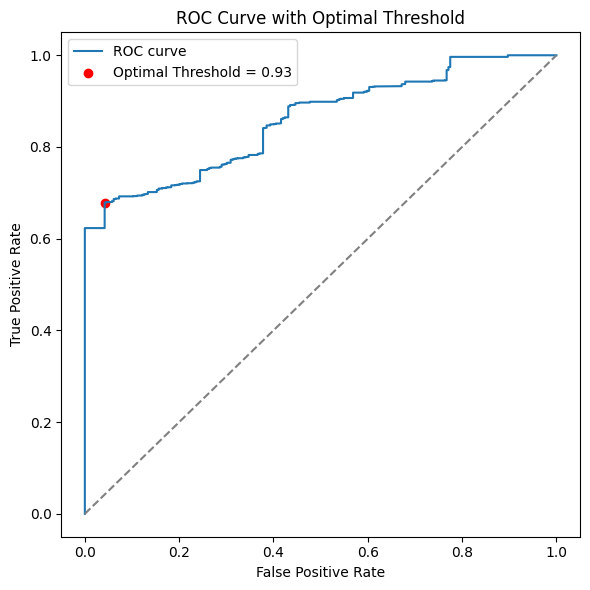

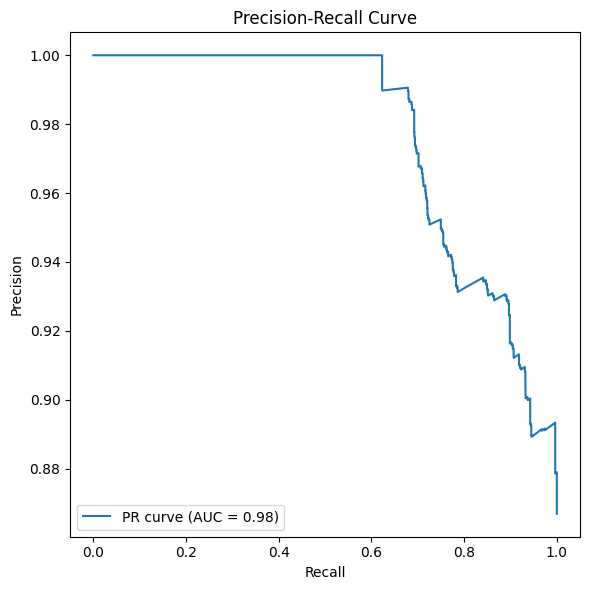


📊 Clustering Evaluation Metrics:
Adjusted Rand Index (ARI): 0.8601
ROC AUC: 0.8578
PR AUC: 0.9769
Accuracy: 0.8669
Precision: 0.8898
Recall (TPR): 0.8669
F1 Score: 0.8669
Top-3 Accuracy: 0.9527

🧠 Binary Classification Metrics (at optimal threshold):
True Positives: 1158, False Positives: 11
True Negatives: 251, False Negatives: 548
TPR (Recall): 0.6788, FPR: 0.0420
TNR (Specificity): 0.9580, FNR: 0.3212

📌 Confusion Matrix (multi-class):
[[159   0  29   0   0   0   0  18   0   0]
 [  0   2  72   0   0   0   0   0   0   0]
 [  6   0  63   0   0   0   0   0   0   0]
 [  0   0   4 443   0   6   0   0   0  18]
 [  0   0   0   0 297   0   0   0   0   0]
 [  0   1   0   0   0 348   0   0   0   0]
 [  5   0   0   0   0   2 103   4   0   0]
 [ 15   0   6   0   0   1   0  73   0   8]
 [  1  28  22  15   0   1   0   0  76   0]
 [  0   0   0   0   0   0   0   0   0 142]]


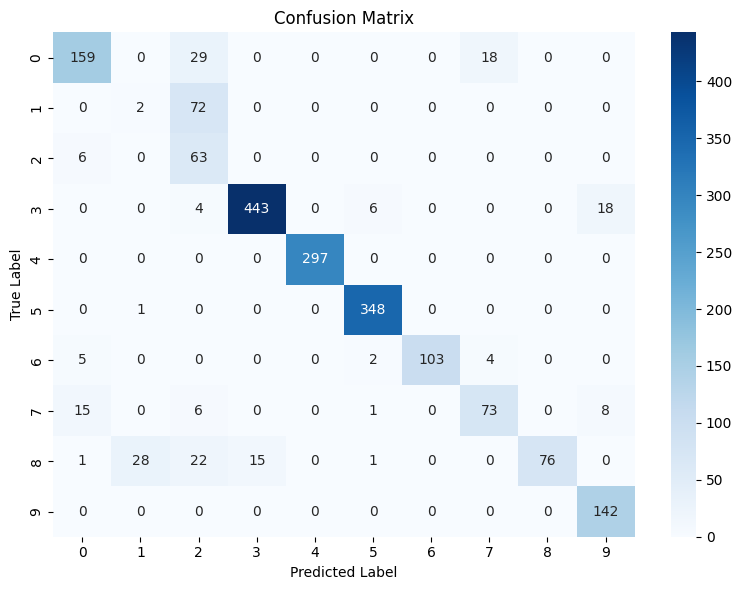

In [ ]:
# Full validation using real data and AHC model with all evaluation metrics and visualizations

# Step 1: Prepare binary matrix from df
general_protocols = ['DNS', 'SSL_NO_CERT', 'TCP', 'UDP', 'ICMP', 'NTP', 'ARP', 'IPV6', 'IGMP']
df_filtered = df[~df['ProtocolName'].isin(general_protocols)]
ip_protocol_matrix = pd.crosstab(df_filtered['Source.IP'], df_filtered['ProtocolName'])
ip_protocol_matrix = ip_protocol_matrix.loc[:, (ip_protocol_matrix != 0).any(axis=0)]
ip_protocol_matrix = ip_protocol_matrix[ip_protocol_matrix.sum(axis=1) > 0]
X_binary = (ip_protocol_matrix > 0).astype(int)

# Step 2: Train/Validation split
X_train, X_val = train_test_split(X_binary, test_size=0.3, random_state=42)

# Step 3: Fit AHC on training data
Z_train = linkage(X_train, method='ward')
k = 10
train_labels = fcluster(Z_train, k, criterion='maxclust')
train_df = pd.DataFrame(X_train)
train_df['Cluster'] = train_labels
centroids = train_df.groupby('Cluster').mean()

# Step 4: Compute true validation labels independently
Z_val = linkage(X_val, method='ward')
val_true_labels = fcluster(Z_val, k, criterion='maxclust') - 1

# Step 5: Define centroid-based prediction
def predict_labels(X, centroids, metric='cosine', threshold=None):
    distances = cdist(X, centroids.values, metric=metric)
    if metric == 'cosine':
        similarities = 1 - distances
        predicted = similarities.argmax(axis=1)
        confidences = similarities.max(axis=1)
        if threshold:
            predicted[confidences < threshold] = -1
    else:
        predicted = distances.argmin(axis=1)
        confidences = distances.min(axis=1)
        if threshold:
            predicted[confidences > threshold] = -1
    return predicted, confidences

# Step 6: Predict and evaluate
val_pred_labels, val_confidence = predict_labels(X_val, centroids, metric='cosine')
val_correct = (val_pred_labels == val_true_labels).astype(int)
fpr, tpr, thresholds = roc_curve(val_correct, val_confidence)
roc_auc = auc(fpr, tpr)

# Step 7: Compute optimal threshold using Youden's J statistic
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]
optimal_tpr = tpr[optimal_idx]
optimal_fpr = fpr[optimal_idx]

# Step 8: Plot ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(optimal_fpr, optimal_tpr, color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Optimal Threshold')
plt.legend()
plt.tight_layout()
plt.show()

# Step 9: Compute additional metrics
mask = (val_pred_labels != -1)  # filter rejected samples if threshold was used
val_true = val_true_labels[mask]
val_pred = val_pred_labels[mask]

cm = confusion_matrix(val_true, val_pred, labels=np.unique(val_true))
precision = precision_score(val_true, val_pred, average='weighted', zero_division=0)
recall = recall_score(val_true, val_pred, average='weighted', zero_division=0)
f1 = f1_score(val_true, val_pred, average='weighted', zero_division=0)
accuracy = accuracy_score(val_true, val_pred)

# PR-AUC computation with correct order
d_prec, d_rec, _ = precision_recall_curve(val_correct, val_confidence)
pr_auc = auc(d_rec, d_prec)

# Generate similarity matrix for top-k accuracy
similarity_matrix = 1 - cdist(X_val, centroids.values, metric='cosine')
topk_acc = top_k_accuracy_score(val_true, similarity_matrix[mask], k=3, labels=np.unique(val_true))

# Step 10: Plot Precision-Recall Curve
plt.figure(figsize=(6, 6))
plt.plot(d_rec, d_prec, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.tight_layout()
plt.show()

# Output metrics
print(f"\n📊 Clustering Evaluation Metrics:")
print(f"Adjusted Rand Index (ARI): {adjusted_rand_score(val_true_labels, val_pred_labels):.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"PR AUC: {pr_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (TPR): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Top-3 Accuracy: {topk_acc:.4f}")

# Compute binary confusion matrix for simplified analysis
bin_cm = confusion_matrix(val_correct, (val_confidence >= optimal_threshold).astype(int))
fp = bin_cm[0, 1]
tn = bin_cm[0, 0]
fn = bin_cm[1, 0]
tp = bin_cm[1, 1]

fpr_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
fnr_rate = fn / (fn + tp) if (fn + tp) > 0 else 0
tpr_rate = tp / (tp + fn) if (tp + fn) > 0 else 0
tnr_rate = tn / (tn + fp) if (tn + fp) > 0 else 0

print("\n🧠 Binary Classification Metrics (at optimal threshold):")
print(f"True Positives: {tp}, False Positives: {fp}")
print(f"True Negatives: {tn}, False Negatives: {fn}")
print(f"TPR (Recall): {tpr_rate:.4f}, FPR: {fpr_rate:.4f}")
print(f"TNR (Specificity): {tnr_rate:.4f}, FNR: {fnr_rate:.4f}")

print("\n📌 Confusion Matrix (multi-class):")
print(cm)

# Optional: Plot heatmap of confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [ ]:
# Evaluate AHC for multiple cluster sizes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    adjusted_rand_score, roc_curve, auc, confusion_matrix,
    precision_score, recall_score, f1_score, accuracy_score,
    precision_recall_curve, top_k_accuracy_score
)
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Step 1: Prepare binary matrix from df
general_protocols = ['DNS', 'SSL_NO_CERT', 'TCP', 'UDP', 'ICMP', 'NTP', 'ARP', 'IPV6', 'IGMP']
df_filtered = df[~df['ProtocolName'].isin(general_protocols)]
ip_protocol_matrix = pd.crosstab(df_filtered['Source.IP'], df_filtered['ProtocolName'])
ip_protocol_matrix = ip_protocol_matrix.loc[:, (ip_protocol_matrix != 0).any(axis=0)]
ip_protocol_matrix = ip_protocol_matrix[ip_protocol_matrix.sum(axis=1) > 0]
X_binary = (ip_protocol_matrix > 0).astype(int)

# Step 2: Train/Validation split
X_train, X_val = train_test_split(X_binary, test_size=0.3, random_state=42)

# Step 3: Loop over different cluster sizes
results = []
for k in [5, 10, 15]:
    Z_train = linkage(X_train, method='ward')
    train_labels = fcluster(Z_train, k, criterion='maxclust')
    train_df = pd.DataFrame(X_train)
    train_df['Cluster'] = train_labels
    centroids = train_df.groupby('Cluster').mean()

    # True validation labels
    Z_val = linkage(X_val, method='ward')
    val_true_labels = fcluster(Z_val, k, criterion='maxclust') - 1

    # Prediction
    distances = cdist(X_val, centroids.values, metric='cosine')
    similarities = 1 - distances
    val_pred_labels = similarities.argmax(axis=1)
    val_confidence = similarities.max(axis=1)
    val_correct = (val_pred_labels == val_true_labels).astype(int)

    # ROC
    fpr, tpr, thresholds = roc_curve(val_correct, val_confidence)
    roc_auc = auc(fpr, tpr)
    youden_j = tpr - fpr
    optimal_idx = np.argmax(youden_j)
    optimal_threshold = thresholds[optimal_idx]

    # Filter out uncertain predictions
    mask = val_confidence >= optimal_threshold
    val_true = val_true_labels[mask]
    val_pred = val_pred_labels[mask]

    # Metrics
    precision = precision_score(val_true, val_pred, average='weighted', zero_division=0)
    recall = recall_score(val_true, val_pred, average='weighted', zero_division=0)
    f1 = f1_score(val_true, val_pred, average='weighted', zero_division=0)
    accuracy = accuracy_score(val_true, val_pred)
    ari = adjusted_rand_score(val_true_labels, val_pred_labels)
    d_prec, d_rec, _ = precision_recall_curve(val_correct, val_confidence)
    pr_auc = auc(d_rec, d_prec)
    similarity_matrix = similarities
    topk_acc = top_k_accuracy_score(val_true, similarity_matrix[mask], k=3, labels=np.unique(val_true))

    # Binary metrics
    bin_cm = confusion_matrix(val_correct, (val_confidence >= optimal_threshold).astype(int))
    fp = bin_cm[0, 1]
    tn = bin_cm[0, 0]
    fn = bin_cm[1, 0]
    tp = bin_cm[1, 1]
    fpr_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr_rate = fn / (fn + tp) if (fn + tp) > 0 else 0
    tpr_rate = tp / (tp + fn) if (tp + fn) > 0 else 0
    tnr_rate = tn / (tn + fp) if (tn + fp) > 0 else 0

    results.append({
        'Timestamp': datetime.now().isoformat(timespec='seconds'),
        'Clusters': k,
        'ARI': ari,
        'ROC AUC': roc_auc,
        'PR AUC': pr_auc,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Top-3 Accuracy': topk_acc,
        'TPR': tpr_rate,
        'FPR': fpr_rate,
        'TNR': tnr_rate,
        'FNR': fnr_rate,
        'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn
    })

# Save to CSV
results_df = pd.DataFrame(results)
results_df.to_csv("ahc_evaluation_metrics.csv", index=False)
print("📁 Results saved to 'ahc_evaluation_metrics.csv'")
print(results_df)


ValueError: Number of given labels (6) not equal to the number of classes in 'y_score' (10).